In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import matplotlib.cm as cm

import particle


In [2]:
g4_file = "input_files/delete_one_gamma_files/prodgenie_bnb_nu_filtered_1g_uboone_20241219T202039_gen_20241219T202809_g4.root"

f = uproot.open(g4_file)


In [3]:
for item in f["Events"].items():
    s = str(item)
    print(s)


('EventAuxiliary', <TBranchElement 'EventAuxiliary' at 0x00017cf12740>)
('simb::MCParticlesimb::MCTruthsim::GeneratedParticleInfoart::Assns_largeant__G4EDep.', <TBranchElement 'simb::MCParticlesimb::MCTruthsim::GeneratedParticleInfoart::Assns_largeant__G4EDep.' (3 subbranches) at 0x00017cf131c0>)
('simb::MCParticlesimb::MCTruthsim::GeneratedParticleInfoart::Assns_largeant__G4EDep./simb::MCParticlesimb::MCTruthsim::GeneratedParticleInfoart::Assns_largeant__G4EDep.present', <TBranchElement 'simb::MCParticlesimb::MCTruthsim::GeneratedParticleInfoart::Assns_largeant__G4EDep.present' at 0x00017cf136d0>)
('simb::MCParticlesimb::MCTruthsim::GeneratedParticleInfoart::Assns_largeant__G4EDep./simb::MCParticlesimb::MCTruthsim::GeneratedParticleInfoart::Assns_largeant__G4EDep.rangeSetID', <TBranchElement 'simb::MCParticlesimb::MCTruthsim::GeneratedParticleInfoart::Assns_largeant__G4EDep.rangeSetID' at 0x00017cf440a0>)
('simb::MCParticlesimb::MCTruthsim::GeneratedParticleInfoart::Assns_largeant__G4

In [4]:
f["Events"]["simb::MCParticles_largeant__G4EDep.obj.ftrajectory.ftrajectory"].interpretation

AsObjects(AsArray(True, False, AsVector(False, Model_pair_3c_TLorentzVector_2c_TLorentzVector_3e_), ()))

primary particles: nu(mu), pi-, gamma, p


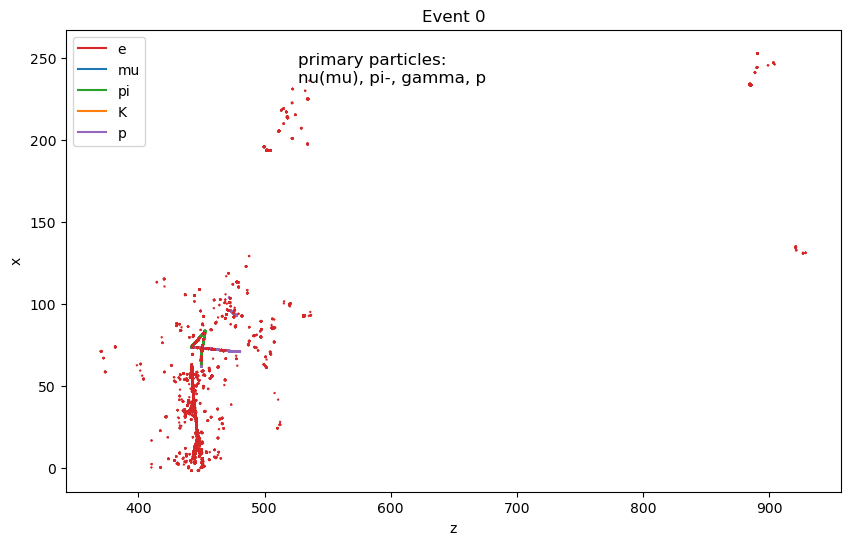

primary particles: mu-, p, n, gamma


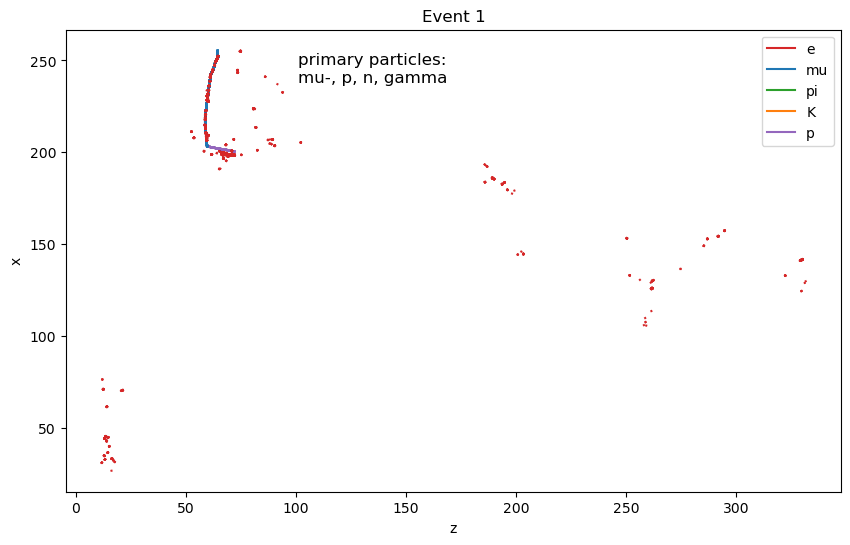

primary particles: mu-, pi+, gamma, p, p, p, p, p, p, p, n, n, n, n, n, n, n, n


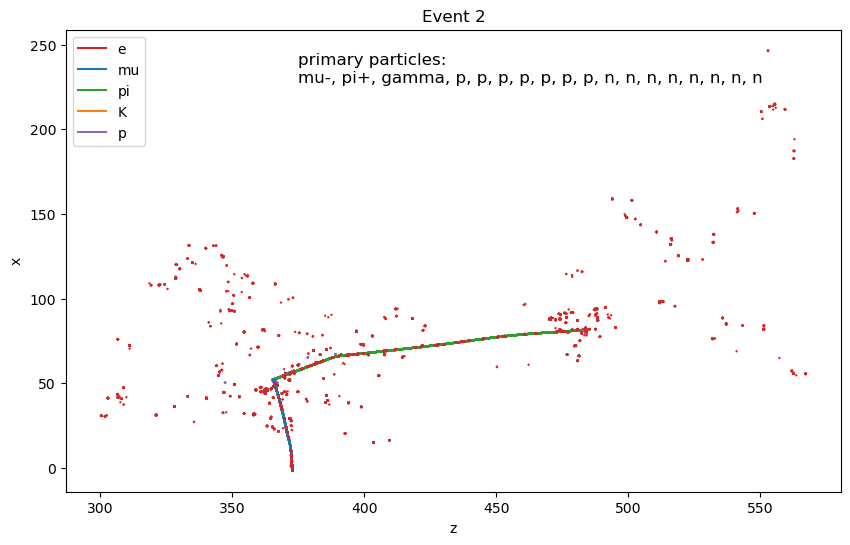

primary particles: e-, p, p, gamma


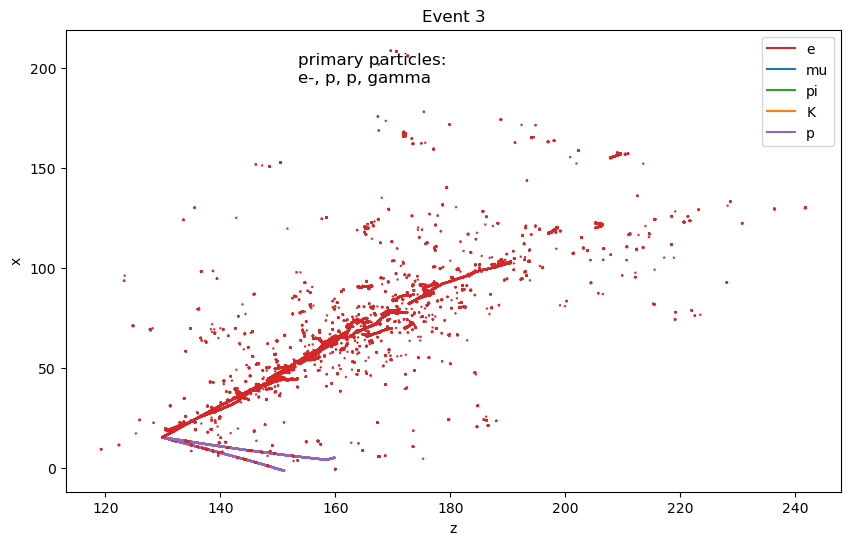

primary particles: nu(mu), gamma, p, n, pi+, n


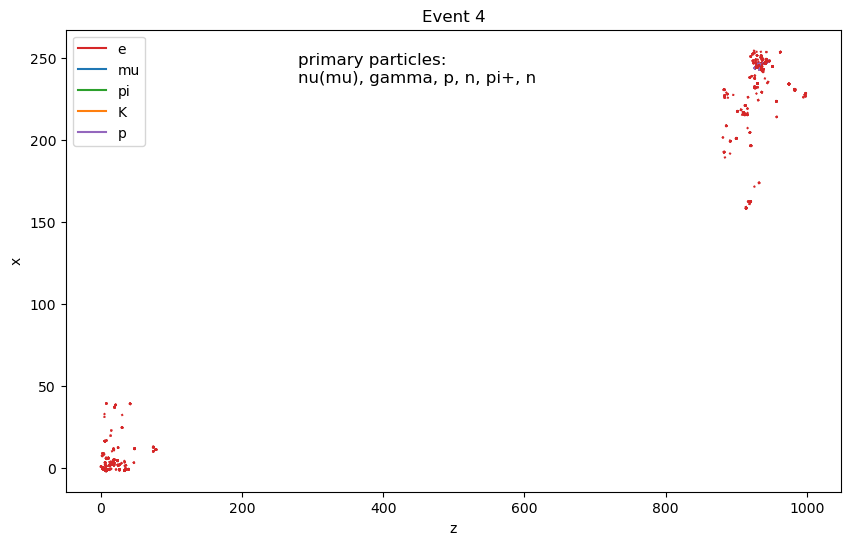

primary particles: mu-, pi-, pi+, gamma, n, p


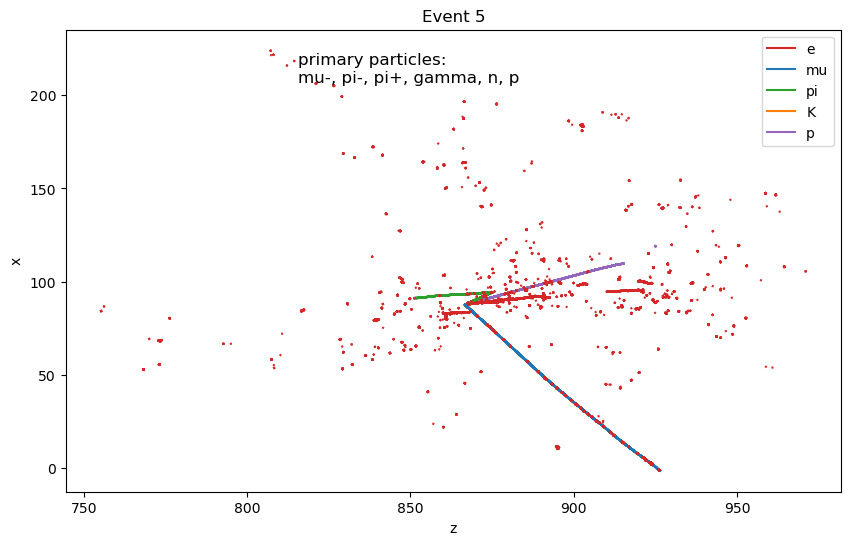

primary particles: nu(mu), gamma, p, n, pi+, n, p


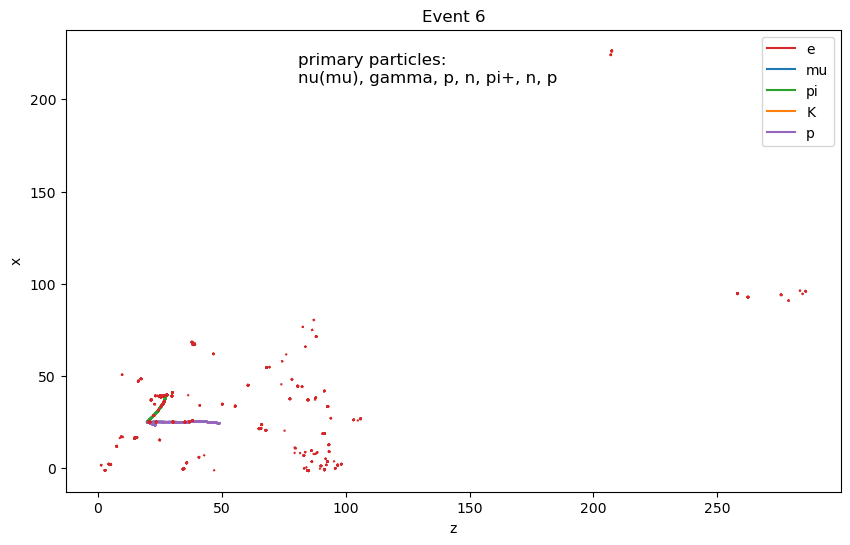

primary particles: nu(mu), gamma, p, n, pi+, n


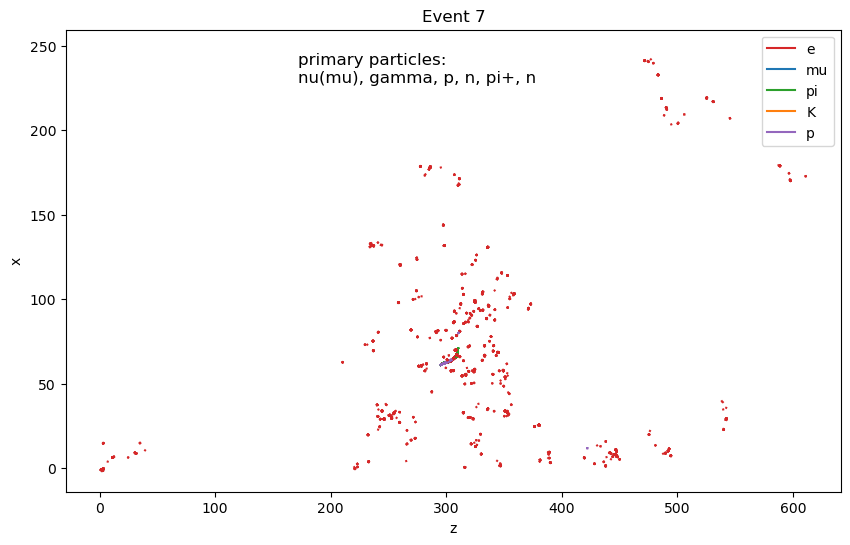

primary particles: mu-, n, p, gamma, p


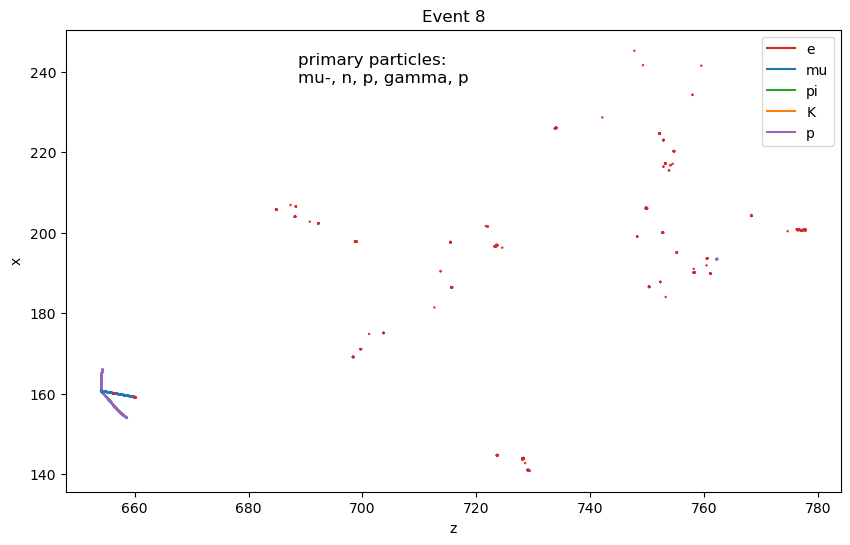

primary particles: mu-, gamma, Lambda, K+, p, p


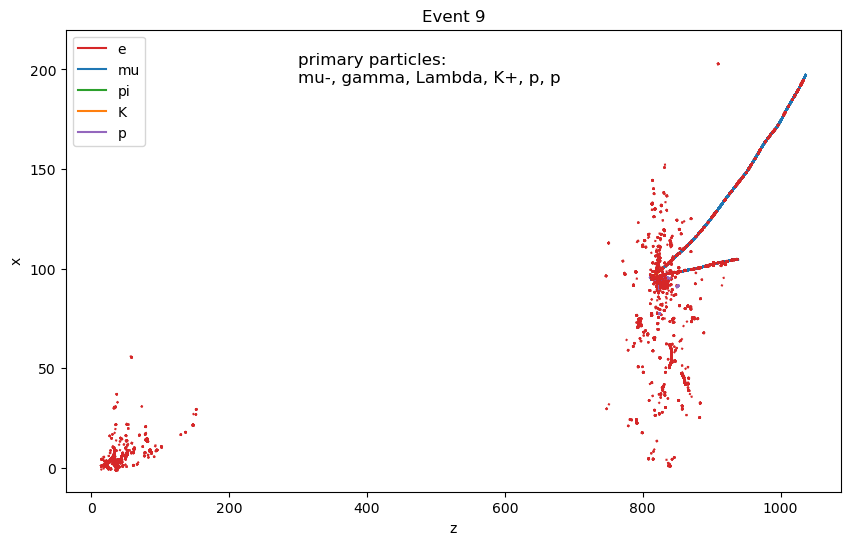

primary particles: mu-, p, p, gamma, pi-, p


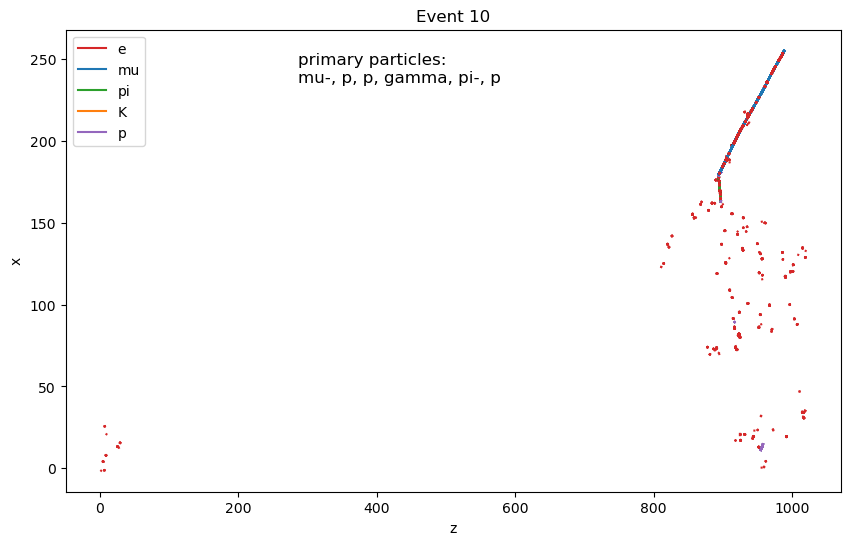

primary particles: nu(mu), gamma, n, n, n, n, n, pi-, p


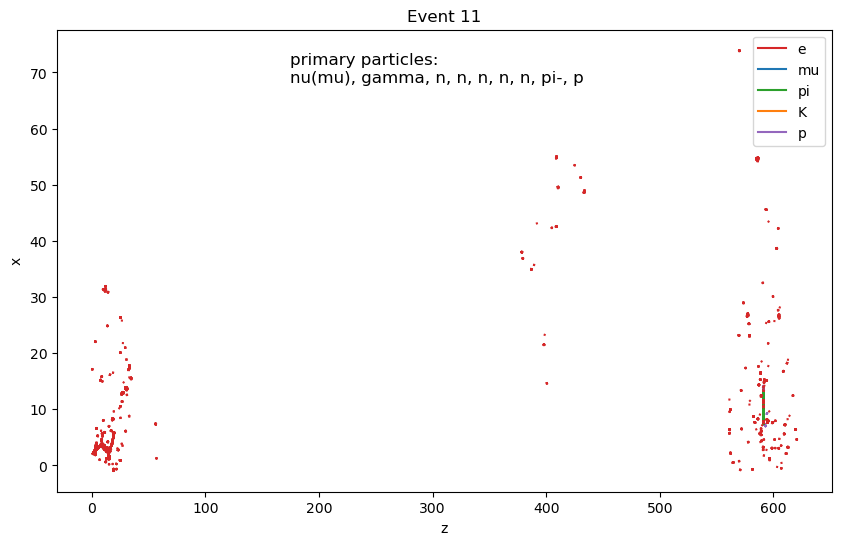

primary particles: nu(mu), gamma, p, n, n, pi+, pi-


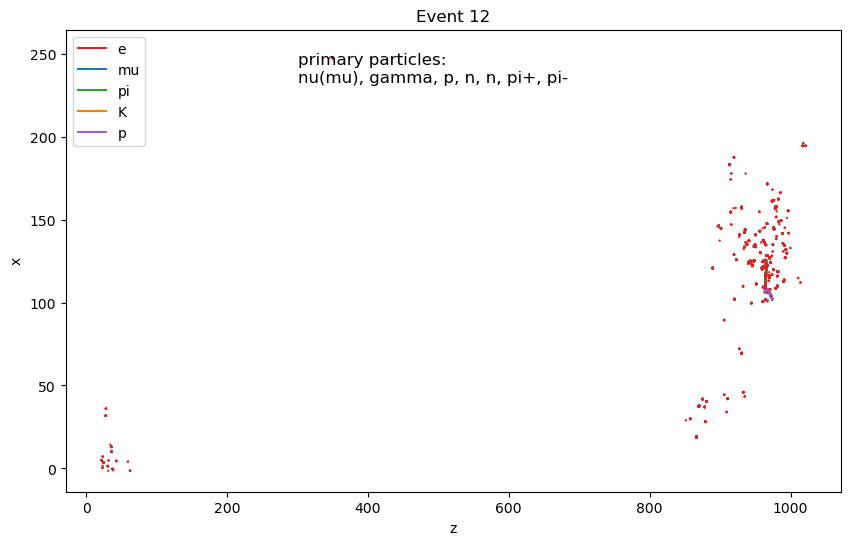

primary particles: nu(mu), gamma, p, pi-, p, p, p, n, n, n, p, p, p, p, p, p, p, n, n


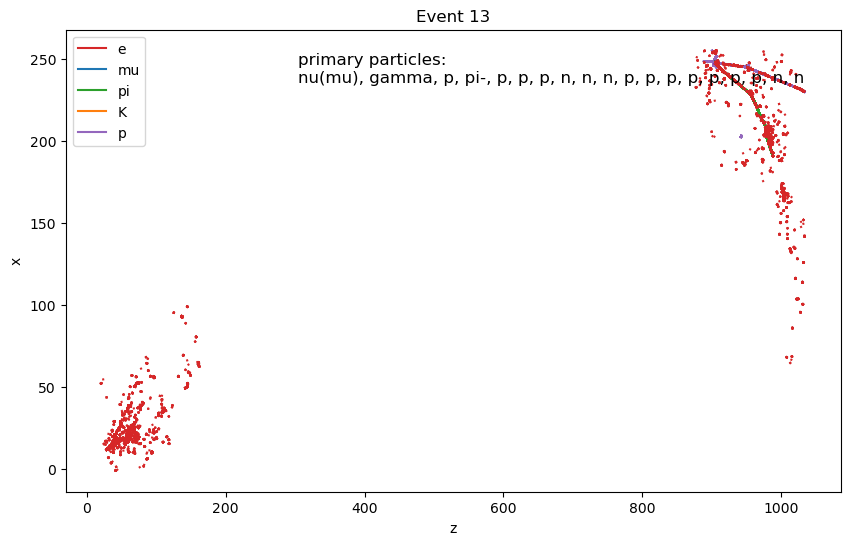

primary particles: mu-, p, gamma, p


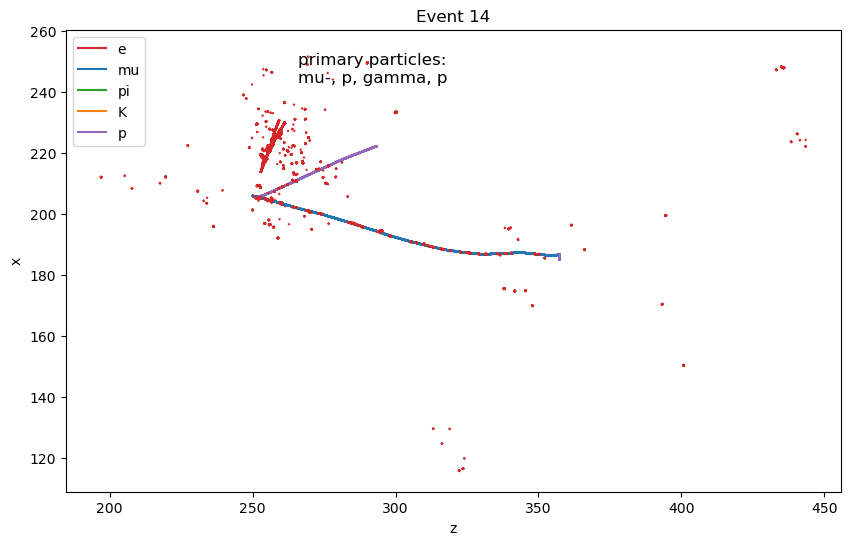

primary particles: nu(mu), gamma, n, p, p, n, n, n, n


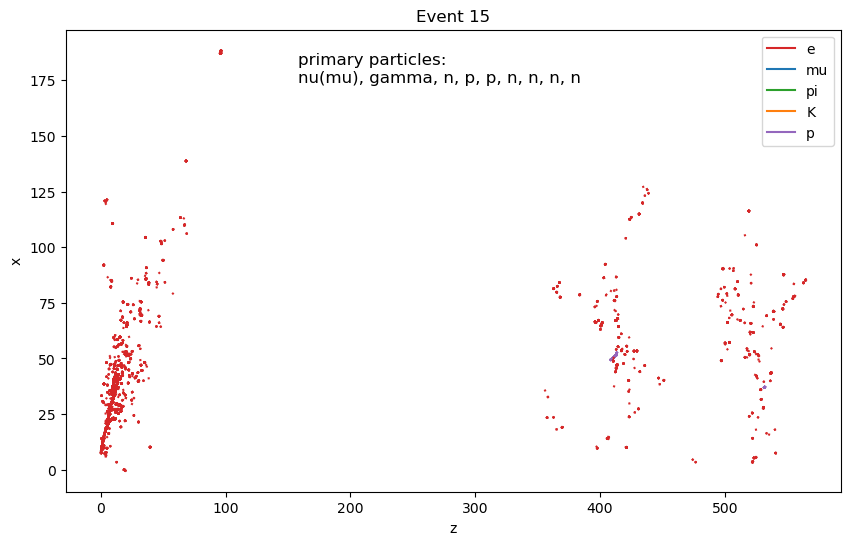

primary particles: nu(mu), gamma, Lambda, K0, pi+, n


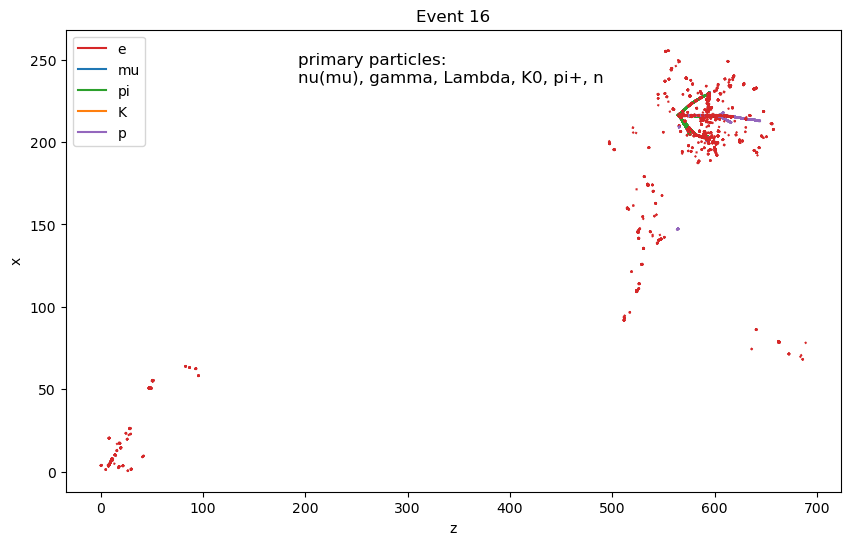

primary particles: nu(mu), gamma, p, n, p, n, n, n


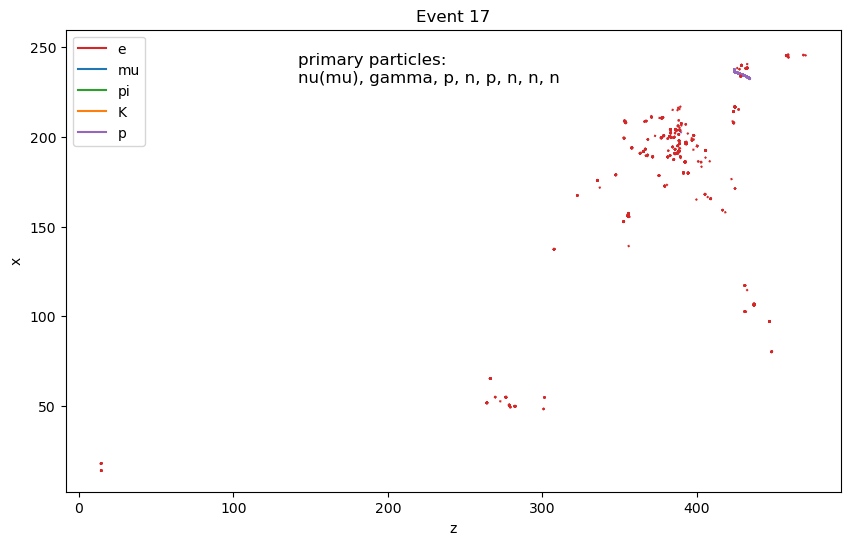

primary particles: mu-, gamma, n, p, p, p, p, p, p, p, n


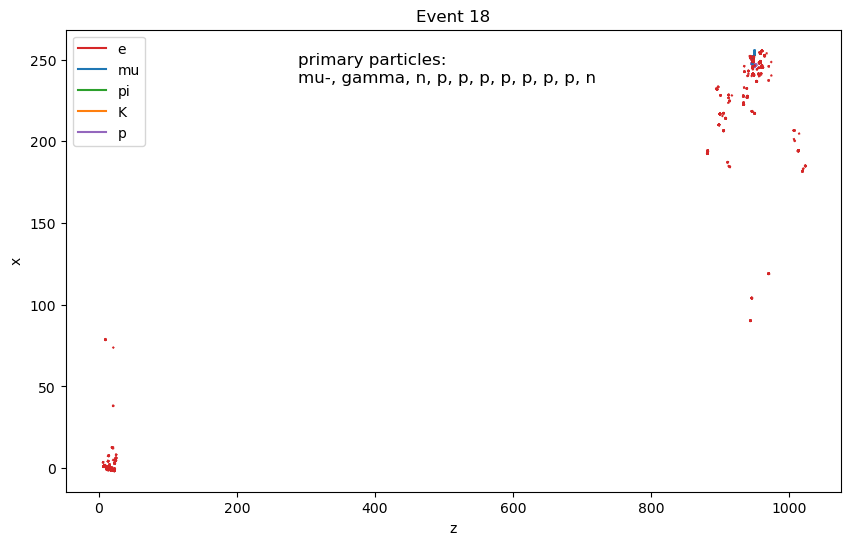

primary particles: mu-, n, p, gamma, p


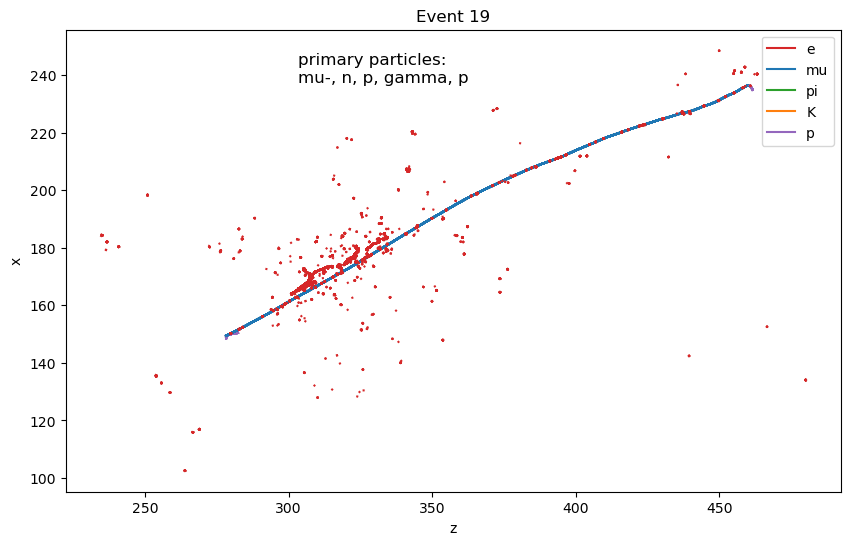

In [5]:
for event_num in range(20):

    fmother = f["Events"]["simb::MCParticles_largeant__G4EDep.obj.fmother"].array(library="np")[event_num]
    fpdgcode = f["Events"]["simb::MCParticles_largeant__G4EDep.obj.fpdgCode"].array(library="np")[event_num]

    primary_particles_str = ""
    for i in range(len(fmother)):
        if fmother[i] == 0:
            primary_particles_str += particle.Particle.from_pdgid(fpdgcode[i]).name + ", "
    primary_particles_str = primary_particles_str[:-2]

    print(f"primary particles: {primary_particles_str}")

    x_start = f["Events"]["sim::SimEnergyDeposits_ionization__G4EDep.obj.startPos.fCoordinates.fX"].array(library="np")[event_num]
    y_start = f["Events"]["sim::SimEnergyDeposits_ionization__G4EDep.obj.startPos.fCoordinates.fY"].array(library="np")[event_num]
    z_start = f["Events"]["sim::SimEnergyDeposits_ionization__G4EDep.obj.startPos.fCoordinates.fZ"].array(library="np")[event_num]

    x_end = f["Events"]["sim::SimEnergyDeposits_ionization__G4EDep.obj.endPos.fCoordinates.fX"].array(library="np")[event_num]
    y_end = f["Events"]["sim::SimEnergyDeposits_ionization__G4EDep.obj.endPos.fCoordinates.fY"].array(library="np")[event_num]
    z_end = f["Events"]["sim::SimEnergyDeposits_ionization__G4EDep.obj.endPos.fCoordinates.fZ"].array(library="np")[event_num]

    pdg_code = f["Events"]["sim::SimEnergyDeposits_ionization__G4EDep.obj.pdgCode"].array(library="np")[event_num]

    particle_charged = [abs(particle.Particle.from_pdgid(pdg_code[i]).charge) for i in range(len(pdg_code))]

    #q = f["Events"]["sim::SimEnergyDeposits_ionization__G4EDep.obj.edep"].array(library="np")[event_num]

    dists = np.sqrt((x_end - x_start)**2 + (y_end - y_start)**2 + (z_end - z_start)**2)

    plt.figure(figsize=(10, 6))

    plt.plot([], [], c="tab:red", label="e")
    plt.plot([], [], c="tab:blue", label="mu")
    plt.plot([], [], c="tab:green", label="pi")
    plt.plot([], [], c="tab:orange", label="K")
    plt.plot([], [], c="tab:purple", label="p")

    for i in range(len(x_start)):
        if abs(pdg_code[i]) == 11:
            plt.plot([z_start[i], z_end[i]], [x_start[i], x_end[i]], c="tab:red")
        elif abs(pdg_code[i]) == 13:
            plt.plot([z_start[i], z_end[i]], [x_start[i], x_end[i]], c="tab:blue")
        elif abs(pdg_code[i]) == 211:
            plt.plot([z_start[i], z_end[i]], [x_start[i], x_end[i]], c="tab:green")
        elif abs(pdg_code[i]) == 321:
            plt.plot([z_start[i], z_end[i]], [x_start[i], x_end[i]], c="tab:orange")
        elif abs(pdg_code[i]) == 2212:
            plt.plot([z_start[i], z_end[i]], [x_start[i], x_end[i]], c="tab:purple")

    plt.text(0.3, 0.95, f"primary particles:\n{primary_particles_str}", transform=plt.gca().transAxes, fontsize=12, verticalalignment="top")
    
    plt.legend()
    plt.xlabel("z")
    plt.ylabel("x")
    plt.title(f"Event {event_num}")
    plt.show()

